In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y=df['sales']

# polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poltnomial_converter = PolynomialFeatures(degree=2, include_bias=False) 

In [9]:
poltnomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [16]:
poly_features=poltnomial_converter.transform(X)

In [19]:
poly_features.shape

(200, 9)

In [18]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
poltnomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
test_predic= model.predict(X_test)

In [31]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

# Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
MAE=mean_absolute_error(y_test, test_predic)

In [35]:
MSE=mean_squared_error(y_test, test_predic)

In [36]:
RMSE=np.sqrt(MSE)

In [39]:
MAE

0.4896798044803804

In [40]:
RMSE

0.664643175726924

In [41]:
# create a diff order poly
# split that into test train
#fit on train
#store/colve then rmse for both train and test
#plot error vs poly degree!

#### Choosing Model by adjusting parameters

In [43]:
train_rmse_error = []
test_rmse_error= []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    
    poly_features=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train, y_train)
    
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse=np.sqrt(mean_squared_error(y_test, test_predict))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [45]:
train_rmse_error

[1.7345941243293763,
 0.587957408529223,
 0.4339344356902067,
 0.3517083688399347,
 0.2509342938178697,
 0.19456664720242475,
 5.42373727977031,
 0.141680566865069,
 0.17093527229416686]

In [46]:
test_rmse_error

[1.5161519375993875,
 0.664643175726924,
 0.5803286825161322,
 0.5077742623175888,
 2.5758370634900736,
 4.21402738473488,
 1374.9574048884165,
 4344.727850519731,
 93796.02671838482]

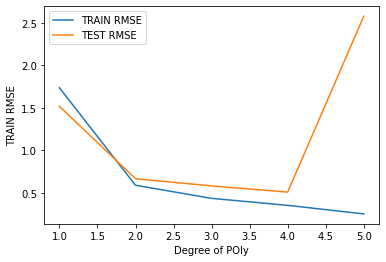

In [53]:
plt.plot(range(1, 6), train_rmse_error[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_error[:5], label='TEST RMSE')

plt.ylabel('TRAIN RMSE')
plt.xlabel('Degree of POly')
plt.legend()

##### Final Model 

In [54]:
final_poly_converter=PolynomialFeatures(degree=3, include_bias=False)

In [55]:
final_model=LinearRegression()

In [56]:
full_converted_X=final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

##### Model dumping and loading

In [57]:
from joblib import dump, load

In [58]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [59]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [60]:
loaded_converter=load('final_converter.joblib')

In [61]:
loaded_model=load('final_poly_model.joblib')

In [62]:
campaign = [[149, 22, 12]]

In [64]:
transformed_data=loaded_converter.fit_transform(campaign)

In [65]:
loaded_model.predict(transformed_data)

array([14.64501014])